In [1]:
import pandas as pd
import numpy as np
import rasterio as rio 
import os
import pkg_resources


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture

from ShallowLearn import LoadData
from ShallowLearn.band_mapping import band_mapping



import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def preprocess_data(data):
    loaded_data = LoadData.LoadFromCSV(data)
    specific_reef = loaded_data.load_specific_reef(6880)
    return np.array(specific_reef)

def reshape_data(data):
    # shape = data.shape
    dim_0 = data.shape[0] * data.shape[2] * data.shape[3] 
    channels = data.shape[1]
    return data.reshape(dim_0, channels)


In [3]:
def draw_histograms(image):
    """
    Draw histogram distributions for each channel in an image using different colors.
    
    Args:
        image (ndarray): Input image array of shape (height, width, num_channels).
    """
    num_channels = image.shape[2]
    colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']  # Add more colors as needed

    for i in range(num_channels):
        channel = image[:, :, i].flatten()
        color = colors[i % len(colors)]
        plt.hist(channel, bins='auto', color=color, alpha=0.7, rwidth=0.85)
    
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram Distributions of Image Channels')
    plt.show()


In [4]:
path = pkg_resources.resource_filename('ShallowLearn', '../Data/Clear_Reefs.csv')
X_train = reshape_data(preprocess_data(path))
print(X_train.shape)
X_train = pd.DataFrame(X_train, columns = band_mapping.keys())


(20906100, 13)


In [5]:
X_train = X_train.drop_duplicates()
X_train = X_train.loc[~(X_train==0).any(axis=1)]


In [7]:
#sns.pairplot(X_train, corner = True)

In [8]:
from sklearn import manifold

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [10]:
from sklearn import decomposition
import matplotlib.pyplot as plt

In [11]:
def plot_histograms(dataframe):

    columns = dataframe.columns
    for column in columns:
        sns.histplot(dataframe[column], kde = True)
        plt.title(column)
        plt.show()

In [12]:
sd = (X_train.sample(100_000, random_state = 42))


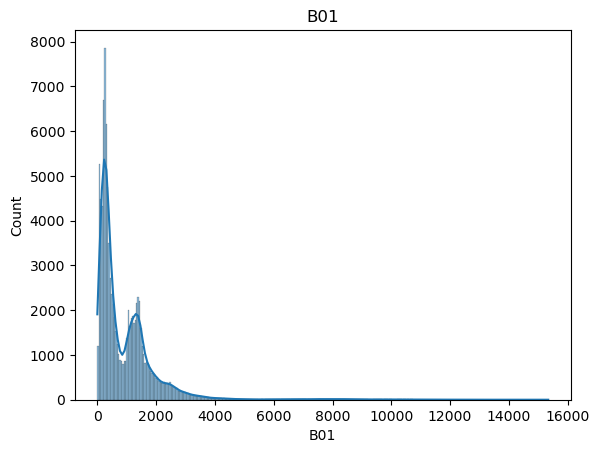

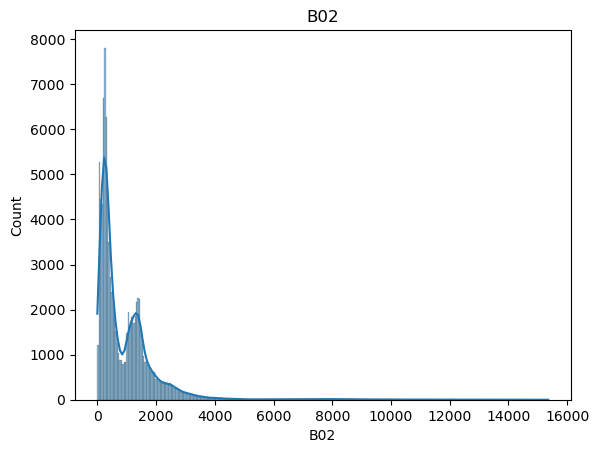

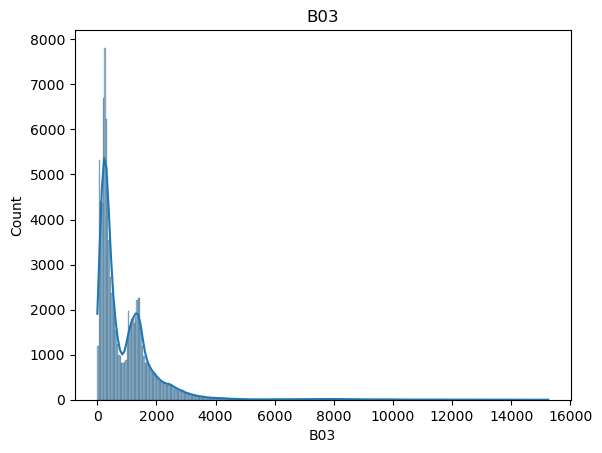

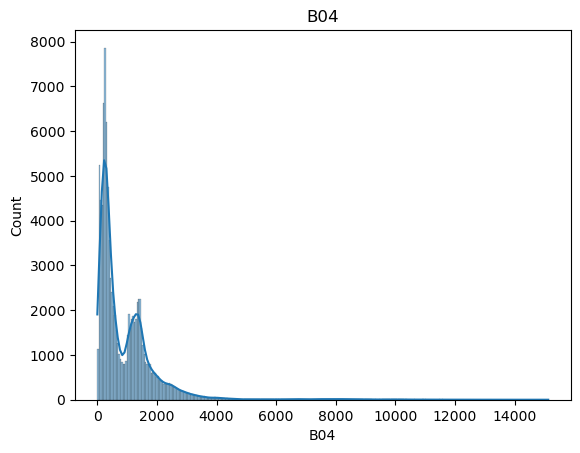

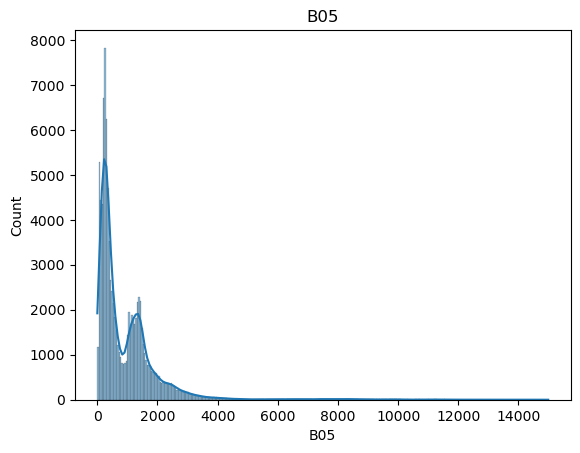

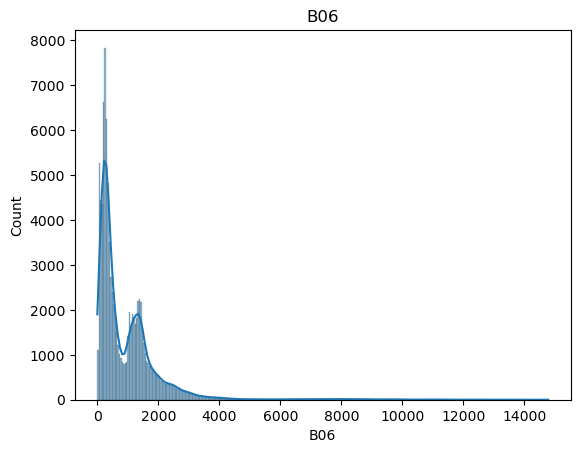

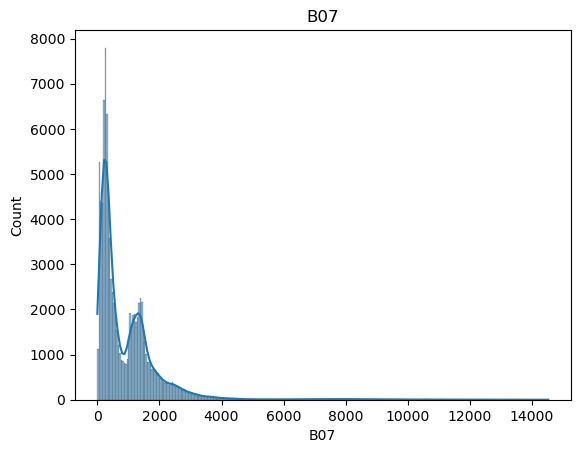

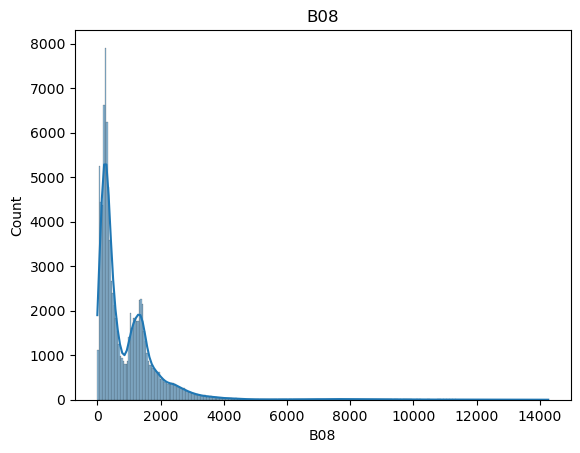

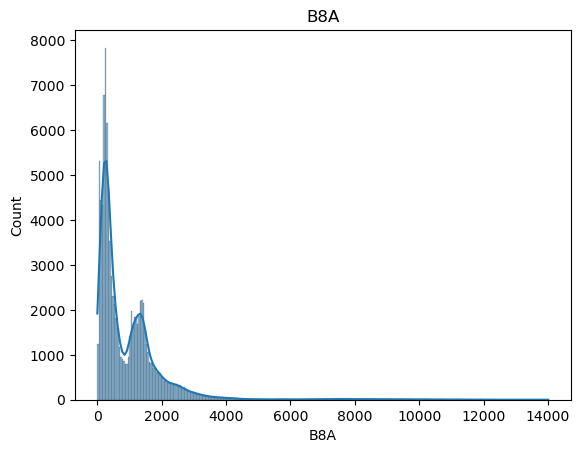

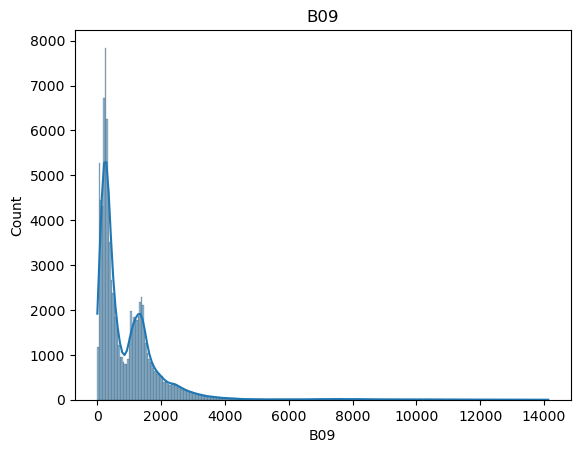

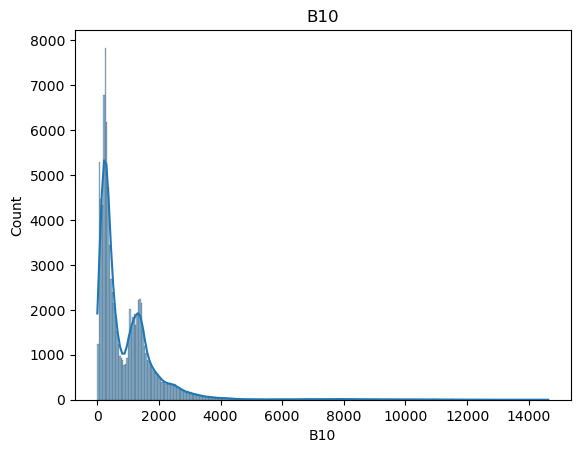

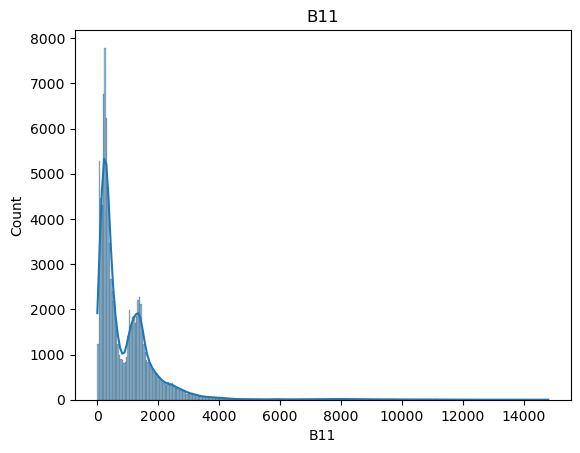

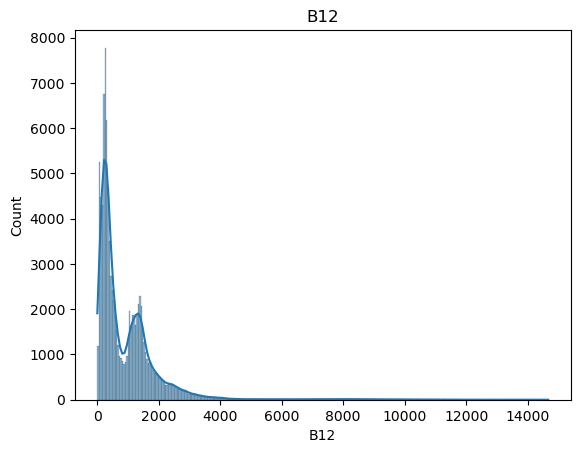

In [13]:
plot_histograms(sd)

In [14]:
pt = PowerTransformer()

In [15]:
sd = pd.DataFrame(pt.fit_transform(sd), columns = sd.columns)

In [16]:
sd.head()

B01       B02       B03       B04       B05       B06       B07  \
0  2.844294  2.838367  2.851410  2.874583  2.900424  2.921789  2.955366   
1  0.830942  0.850742  0.873455  0.897368  0.900372  0.882861  0.866945   
2  0.229357  0.198763  0.151406  0.176089  0.202699  0.231089  0.165164   
3 -0.450456 -0.460488 -0.470187 -0.475053 -0.469875 -0.472463 -0.488274   
4  0.583919  0.597792  0.600407  0.588255  0.593052  0.602271  0.599885   

        B08       B8A       B09       B10       B11       B12  
0  2.989686  3.025902  3.065713  3.063414  3.056992  3.067152  
1  0.854076  0.868837  0.912133  0.935172  0.940033  0.940655  
2  0.145936  0.102375  0.110689  0.110637  0.086020  0.138456  
3 -0.491092 -0.480882 -0.440932 -0.372152 -0.336308 -0.327651  
4  0.592542  0.592504  0.602274  0.614903  0.599857  0.602465

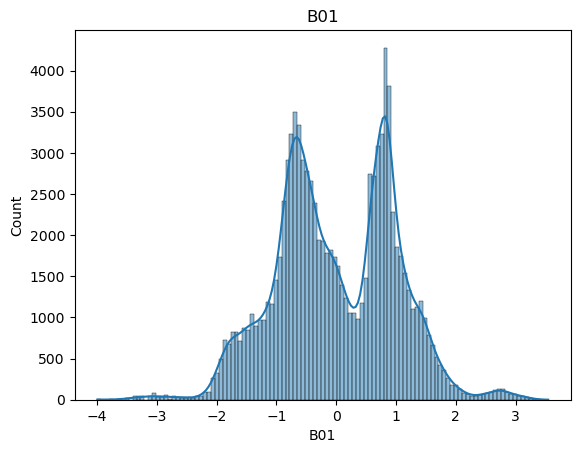

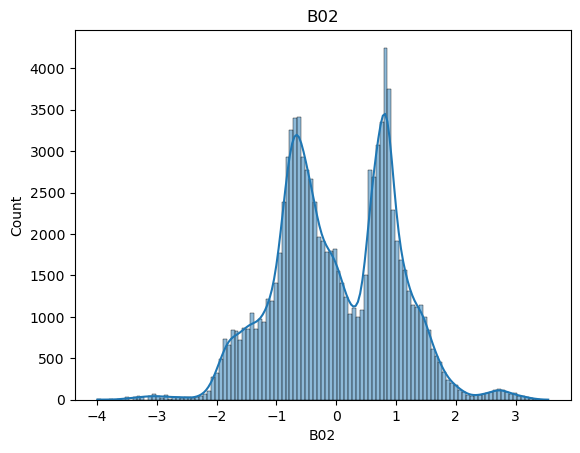

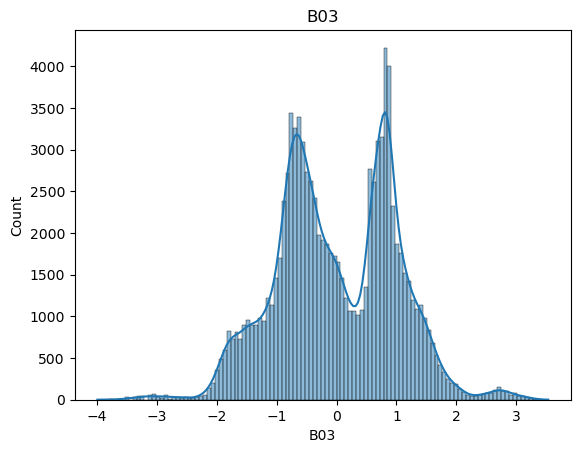

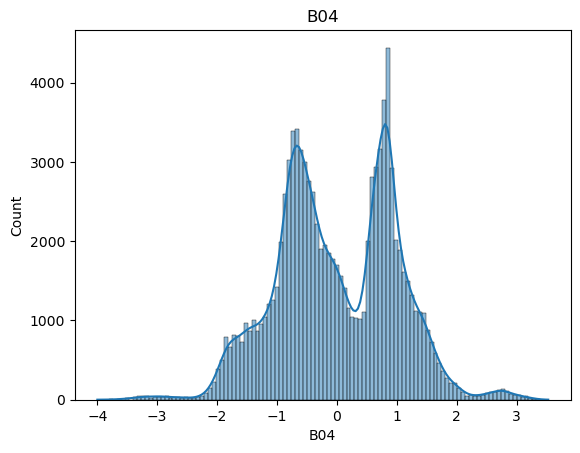

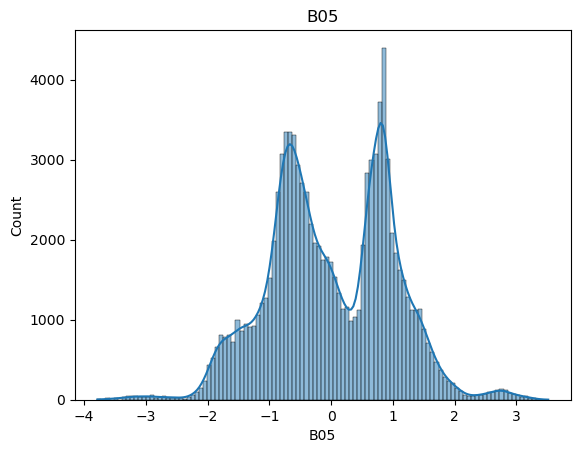

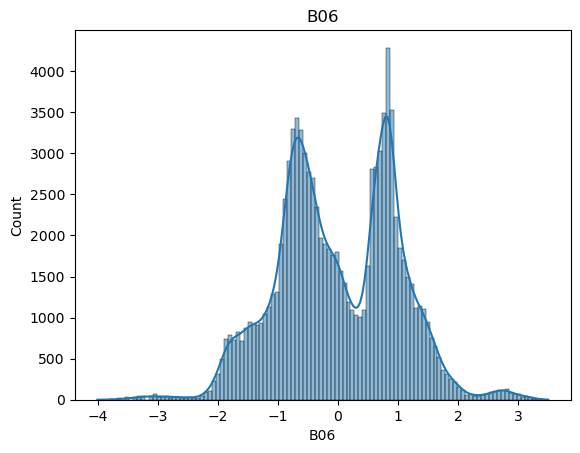

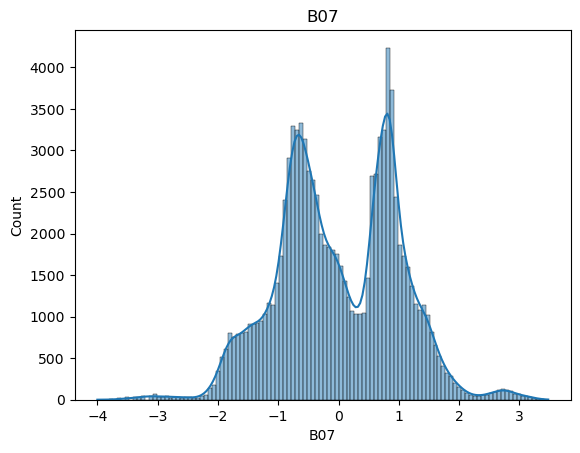

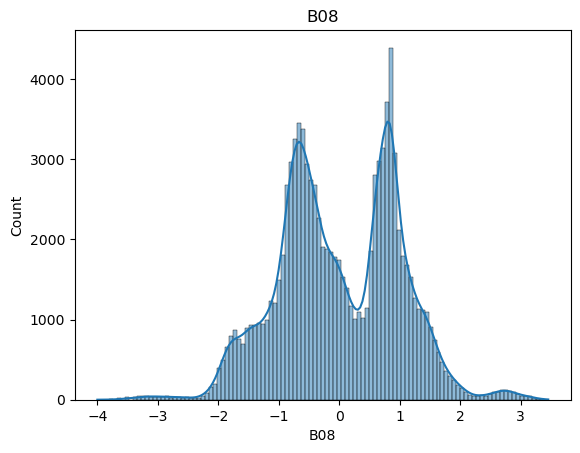

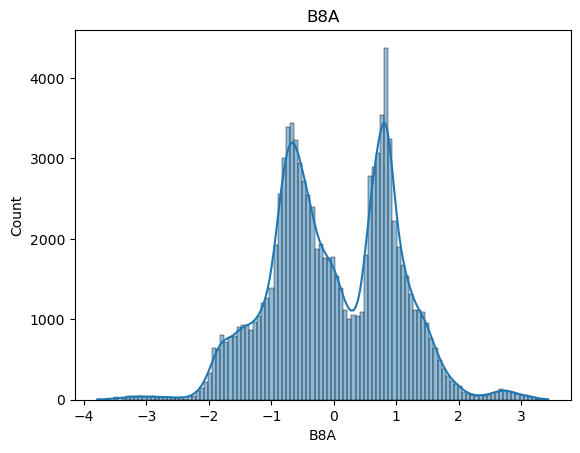

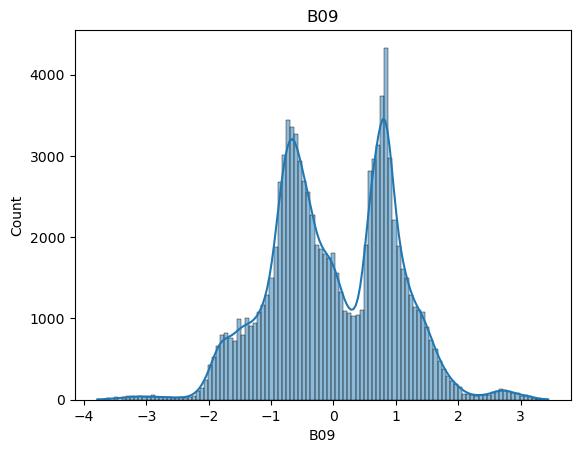

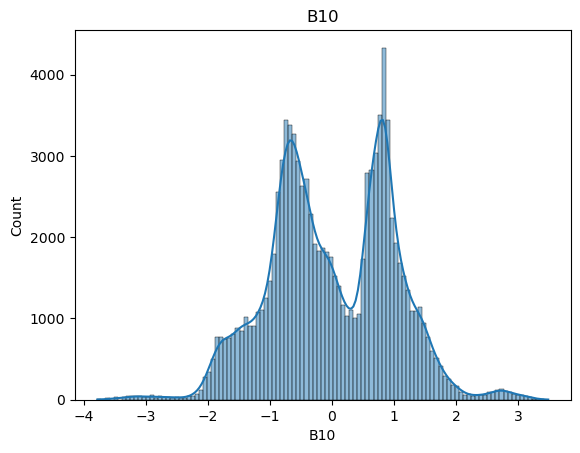

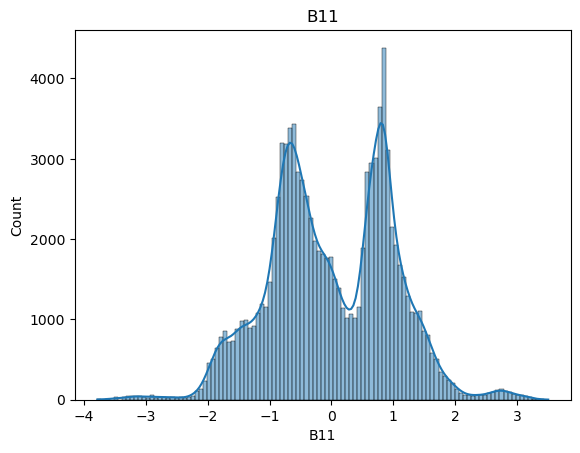

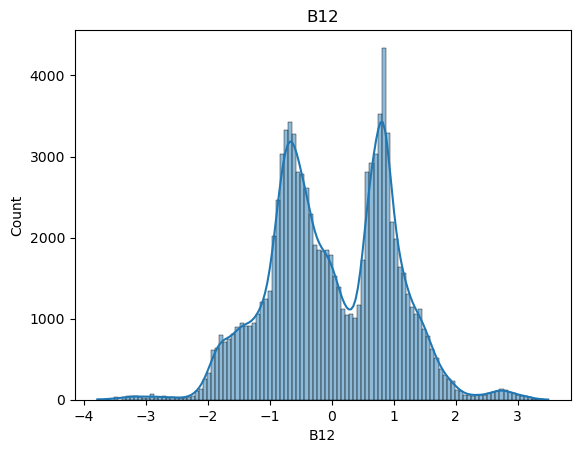

In [17]:
plot_histograms(sd)

In [18]:
X_train.shape

(9722001, 13)

In [18]:
scaler = StandardScaler()

In [19]:
rs = scaler.fit_transform(sd)

In [20]:
rs = pd.DataFrame(rs, columns = X_train.columns)

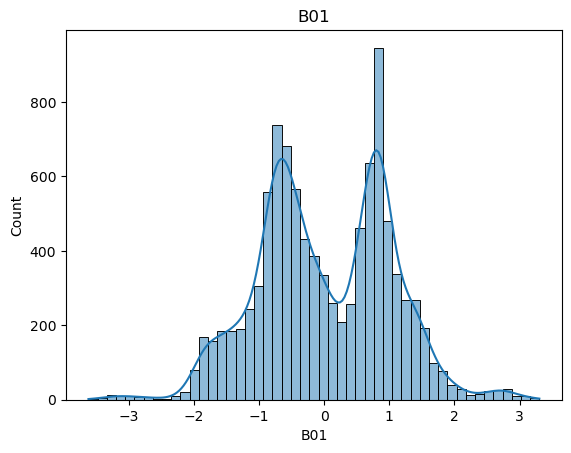

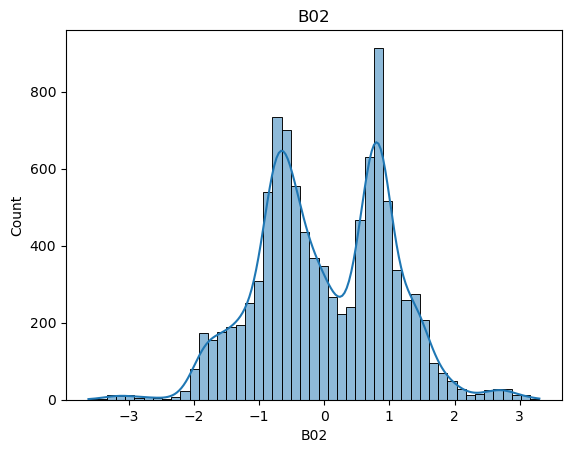

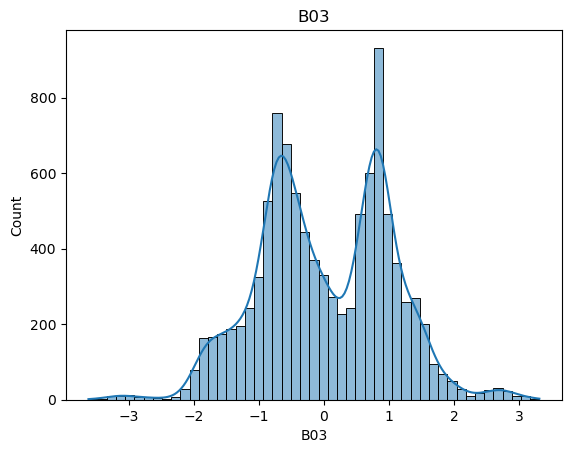

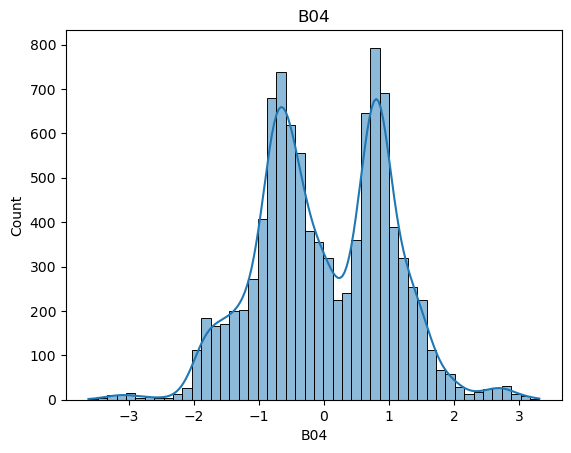

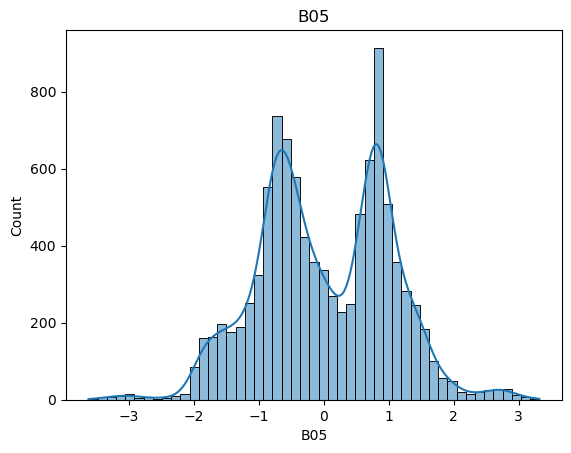

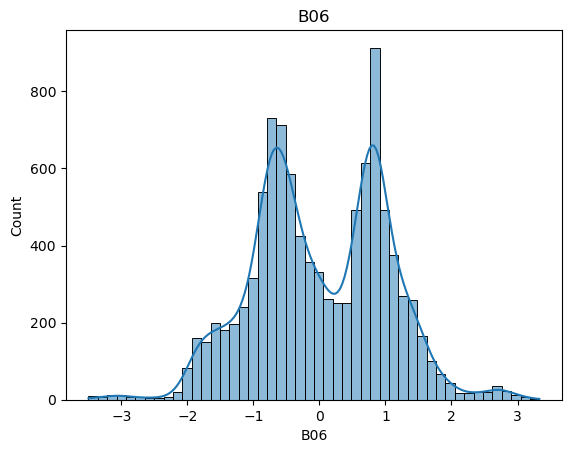

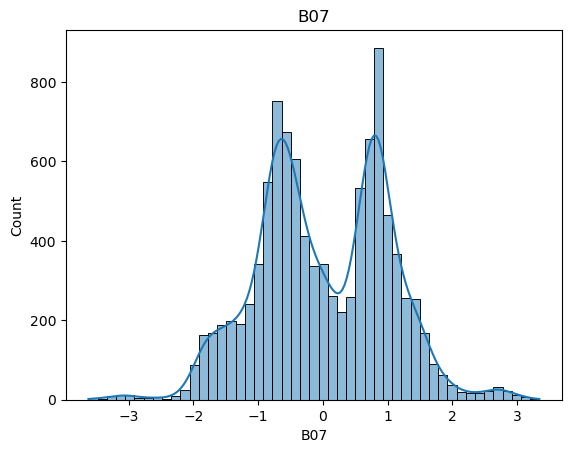

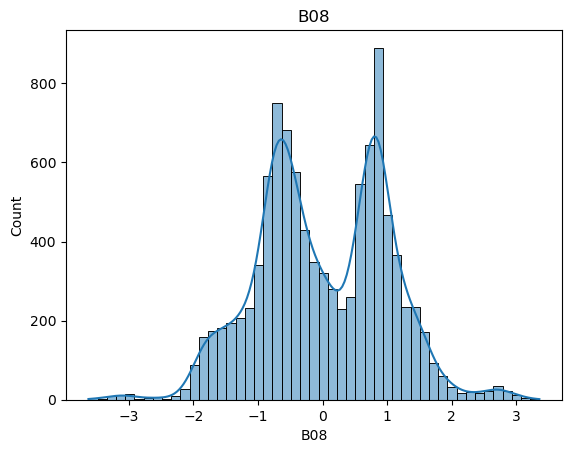

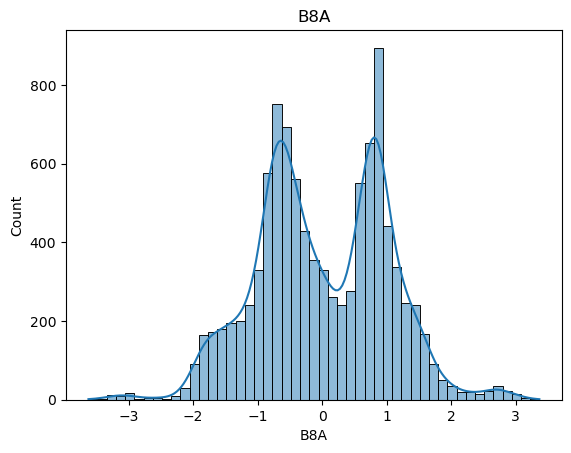

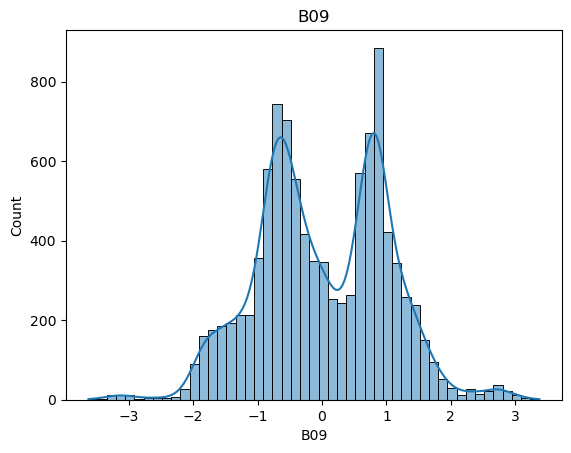

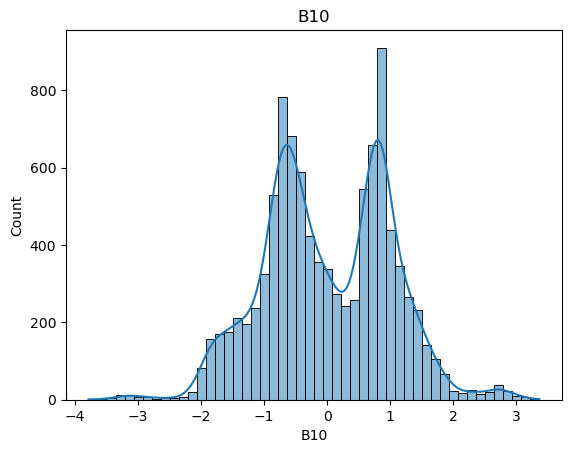

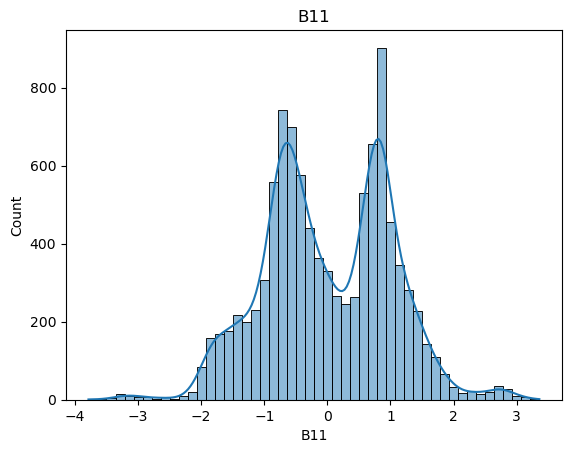

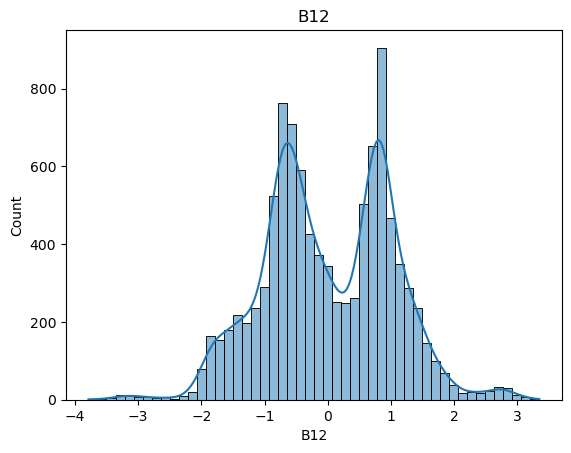

In [21]:
plot_histograms(rs.sample(10_000, random_state = 42))

In [31]:
pixel_df = pt.transform(X_train)
pixel_df = pd.DataFrame(pixel_df, columns = band_mapping.keys())
sample_data = pixel_df.sample(100_000, random_state = 42)
# pd.DataFrame(pca_data).plot.scatter(x = 0, y = 1)

In [32]:
pca = decomposition.PCA(n_components = 2, random_state = 42)
pca_data = pca.fit_transform(sample_data)


/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


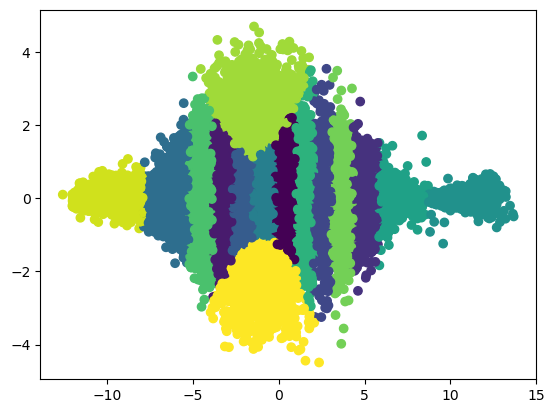

In [29]:
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_

# Plot the reduced data and color it by the cluster labels
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.show()

In [49]:
pixel_df = X_train
pixel_df = pd.DataFrame(pixel_df, columns = band_mapping.keys())
sample_data = pixel_df.sample(100_000, random_state = 42)
pca = decomposition.PCA(n_components = 2, random_state = 42)
pca_data = pca.fit_transform(sample_data)

# pd.DataFrame(pca_data).plot.scatter(x = 0, y = 1)

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


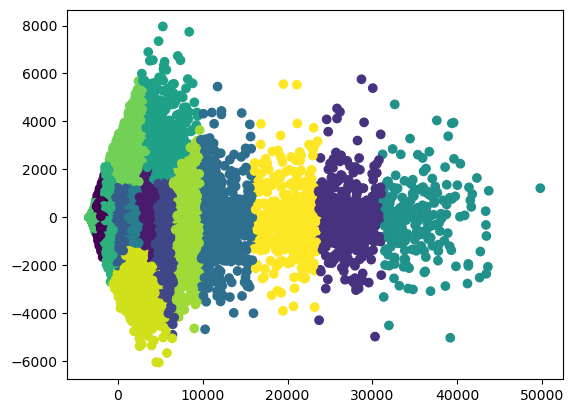

In [50]:
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_

# Plot the reduced data and color it by the cluster labels
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.show()

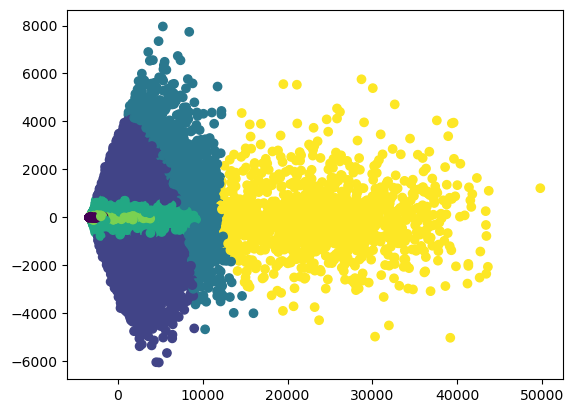

In [52]:
gm = GaussianMixture(n_components=6, random_state=42)
gm.fit(pca_data)
labels = gm.predict(pca_data)

# Plot the reduced data and color it by the cluster labels
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.show()

In [41]:
pixel_df = scaler.fit_transform(pt.transform(X_train))
pixel_df = pd.DataFrame(pixel_df, columns = band_mapping.keys())
sample_data = pixel_df.sample(100_000, random_state = 42)
# pd.DataFrame(pca_data).plot.scatter(x = 0, y = 1)

In [42]:
# tsne = manifold.TSNE(n_components = 2,learning_rate=400, perplexity = 25, random_state = 42, verbose = 2, n_iter = 2000, n_jobs=-1)
# transformed_data = tsne.fit_transform(pca_data)
tsne = manifold.TSNE(n_components = 2,learning_rate=500, perplexity = 35, random_state = 42, verbose = 2, n_iter = 2000, n_jobs=-1)
transformed_data = tsne.fit_transform(pca_data)

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.025s...
[t-SNE] Computed neighbors for 100000 samples in 0.729s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional probab

In [43]:
import matplotlib.pyplot as plt 
from sklearn.mixture import GaussianMixture

In [44]:
#copy_tf = transformed_data.copy()

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


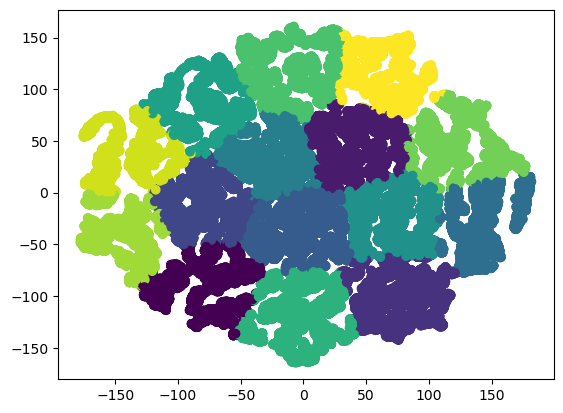

In [53]:
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(transformed_data)
labels = kmeans.labels_

# Plot the reduced data and color it by the cluster labels
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.show()

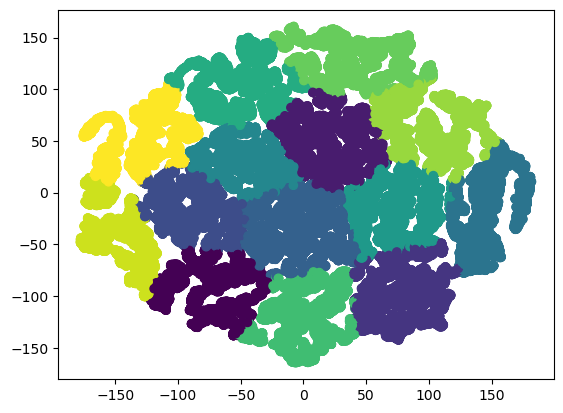

In [54]:
gm = GaussianMixture(n_components=14, random_state=42)
gm.fit(transformed_data)
labels = gm.predict(transformed_data)

# Plot the reduced data and color it by the cluster labels
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.show()

In [504]:
# import matplotlib.pyplot as plt 
# kmeans = KMeans(n_clusters=14, random_state=42)
# kmeans.fit(transformed_data)
# labels = kmeans.labels_

# # Create a 3D scatter plot of the t-SNE clusters
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# scatter = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], c=labels, cmap='viridis')
# legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
# ax.add_artist(legend1)

# ax.set_xlabel("t-SNE Dimension 1")
# ax.set_ylabel("t-SNE Dimension 2")
# ax.set_zlabel("t-SNE Dimension 3")

# plt.title("t-SNE Clustering with K-means Labels")
# plt.show()

# # Create a pairplot to visualize pairwise relationships
# data_with_tsne = np.concatenate([sample_data, transformed_data], axis=1)
# data_with_tsne = np.column_stack([data_with_tsne, labels])

# labels_names = ['Feature ' + str(i+1) for i in range(13)] + ['t-SNE Dimension 1', 't-SNE Dimension 2', 't-SNE Dimension 3', 'Cluster']
# df = pd.DataFrame(data_with_tsne, columns=labels_names)

# sns.pairplot(df, vars=labels_names[:-1], hue='Cluster', plot_kws={'alpha': 0.5})
# plt.suptitle('Pairwise Relationships with t-SNE Clusters (K-means Labels)')
# plt.show()

In [55]:
path = pkg_resources.resource_filename('ShallowLearn', '../Data/Clear_Reefs.csv')
X_train = reshape_data(preprocess_data(path))
print(X_train.shape)
X_train = pd.DataFrame(X_train, columns = band_mapping.keys())
X_train = X_train.loc[~(X_train==0).any(axis=1)]

(20906100, 13)


In [56]:
X_train.drop(columns = 'B10', inplace = True)

In [57]:
pt.fit(X_train)

PowerTransformer()

In [59]:
pixel_df = scaler.fit_transform(pt.transform(X_train))
del band_mapping['B10']
pixel_df = pd.DataFrame(pixel_df, columns = band_mapping.keys())
sample_data = pixel_df.sample(100_000, random_state = 42)

In [60]:
from xgboost import XGBClassifier

In [61]:
from sklearn.model_selection import train_test_split

In [127]:
def scale_prop(arr):
    return scaler.fit_transform(pt.transform(arr))

In [63]:
sd

B01       B02       B03       B04       B05       B06       B07  \
0      2.844294  2.838367  2.851410  2.874583  2.900424  2.921789  2.955366   
1      0.830942  0.850742  0.873455  0.897368  0.900372  0.882861  0.866945   
2      0.229357  0.198763  0.151406  0.176089  0.202699  0.231089  0.165164   
3     -0.450456 -0.460488 -0.470187 -0.475053 -0.469875 -0.472463 -0.488274   
4      0.583919  0.597792  0.600407  0.588255  0.593052  0.602271  0.599885   
...         ...       ...       ...       ...       ...       ...       ...   
99995 -0.364745 -0.353397 -0.321853 -0.325959 -0.366171 -0.391687 -0.401536   
99996 -2.125195 -2.178431 -2.235383 -2.275815 -2.277034 -2.199420 -2.198460   
99997  1.704602  1.654012  1.564207  1.493819  1.469821  1.452397  1.426835   
99998  0.645556  0.426406  0.222679  0.197230  0.136878  0.085801  0.067610   
99999  1.228043  1.224532  1.220898  1.217781  1.214415  1.210719  1.205512   

            B08       B8A       B09       B10       B11       B12  
0      2.989686  3.025902  3.065713  3.063414  3.056992  3.067152  
1      0.854076  0.868837  0.912133  0.935172  0.940033  0.940655  
2      0.145936  0.102375  0.110689  0.110637  0.086020  0.138456  
3     -0.491092 -0.480882 -0.440932 -0.372152 -0.336308 -0.327651  
4      0.592542  0.592504  0.602274  0.614903  0.599857  0.602465  
...         ...       ...       ...       ...       ...       ...  
99995 -0.406500 -0.411399 -0.418969 -0.426548 -0.422009 -0.403014  
99996 -2.256815 -2.298617 -2.298807 -2.239245 -2.165501 -2.148292  
99997  1.424904  1.412262  1.367731  1.386709  1.409714  1.413665  
99998  0.073355  0.058443  0.029341  0.061091  0.047408  0.039675  
99999  1.199066  1.190601  1.180701  1.169422  1.157361  1.144231  

[100000 rows x 13 columns]

In [64]:
# X_train.drop(columns = ["B10"], axis = 1, inplace = True)

In [65]:
# scaler.fit(X_train)

In [66]:
sd.drop(columns = ['B10'], axis = 1, inplace = True)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(sd,labels, test_size=.2)

In [68]:
#scaler = StandardScaler().fit(X_train)

In [69]:
bst = XGBClassifier(n_estimators=5, max_depth=8, learning_rate=1, objective='multi:softmax', num_class=len(np.unique(labels)))

In [70]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=0, num_class=14,
              num_parallel_tree=1, objective='multi:softmax', ...)

In [71]:
preds = bst.predict(X_test)

In [72]:
from sklearn.metrics import roc_auc_score

In [73]:
preds = bst.predict_proba(X_test)

In [74]:
y_test.shape

(20000,)

In [75]:
roc_auc_score(y_test,preds, multi_class='ovo', average='macro')

0.9856548864931963

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
preds = bst.predict(X_test)

In [78]:
cm = confusion_matrix(y_test, preds)

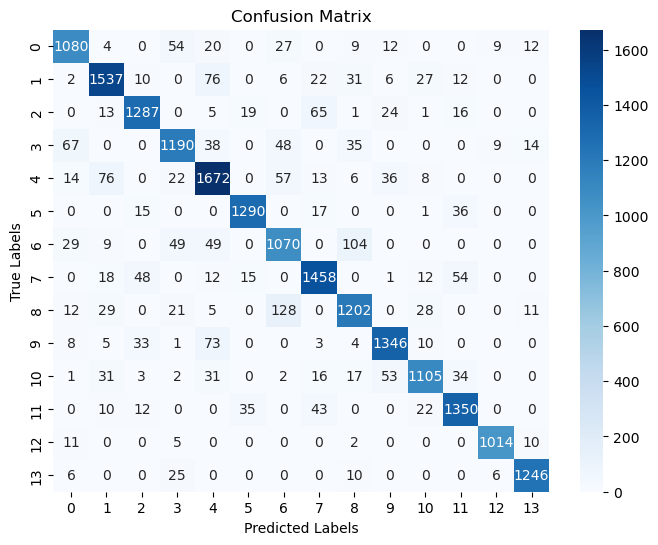

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [80]:
import os
import glob

# specify the directory path
dir_path = '/media/ziad/Expansion/Cleaned_Data_Directory'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*6880*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [81]:
from ShallowLearn import ImageHelper

In [154]:
img_name = dir_list[22]

In [155]:
img_test = ImageHelper.load_img(img_name)

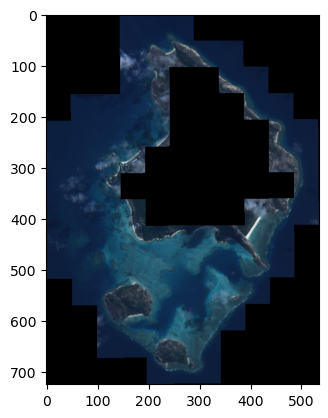

In [156]:
ImageHelper.plot_rgb(img_test, plot = True)

In [157]:
img_test = ImageHelper.remove_channel(img_test, 10)

In [158]:
original_shape = img_test.shape

In [159]:
original_shape

(725, 534, 12)

In [160]:
test_arr = img_test.reshape(original_shape[0] * original_shape[1], original_shape[2])

In [161]:
test_arr = np.where(test_arr == 0, np.nan, test_arr)

In [162]:
test_pred = bst.predict(scale_prop(test_arr))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [163]:
test_pred = test_pred.reshape(original_shape[0], original_shape[1])

In [164]:
from ShallowLearn.ImageHelper import discrete_implot

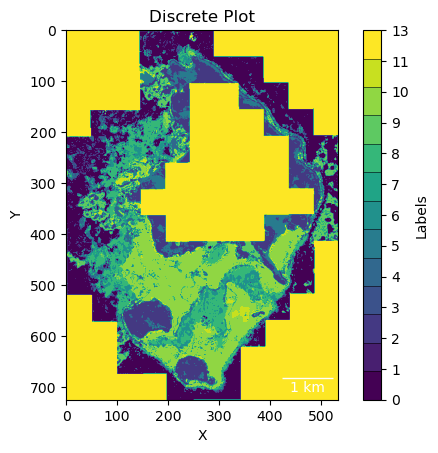

In [165]:
discrete_implot(test_pred)

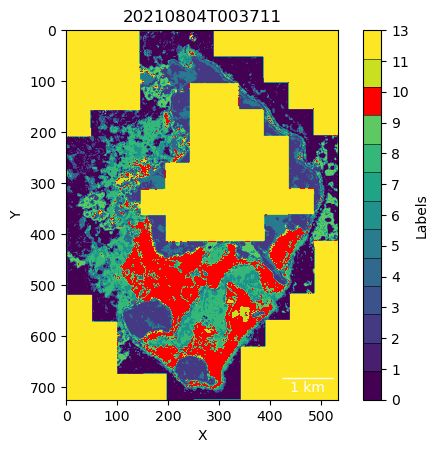

In [166]:
discrete_implot(test_pred, [10], ['red'], title = img_name.split('/')[-1].split('.')[0].split('_')[-2].split('no')[0])

In [167]:

# specify the directory path
dir_path = '/media/ziad/Expansion/Honduras_Clipped'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [175]:
img_num = 15
img_test = ImageHelper.load_img(dir_list[img_num])

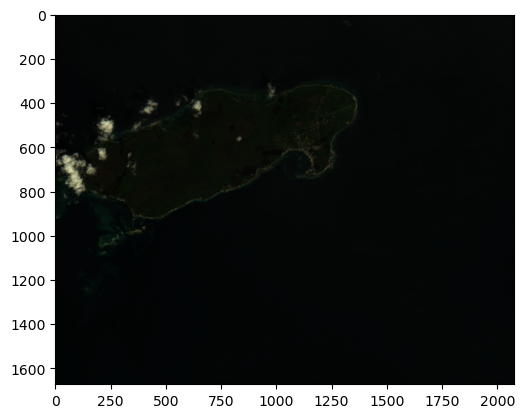

In [176]:
ImageHelper.plot_rgb(img_test, plot = True)

In [177]:
#img_test = ImageHelper.remove_channel(img_test, 10)


/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


0


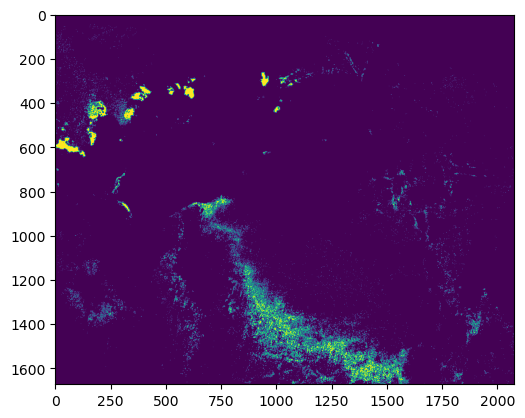

1


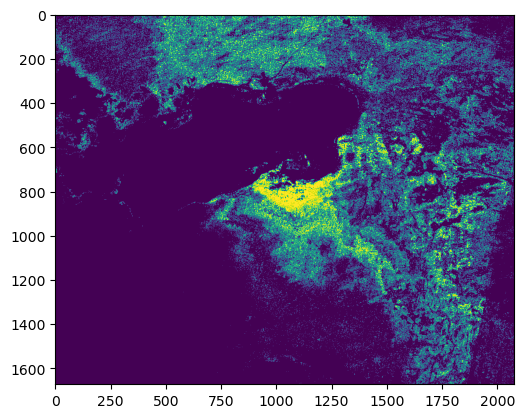

2


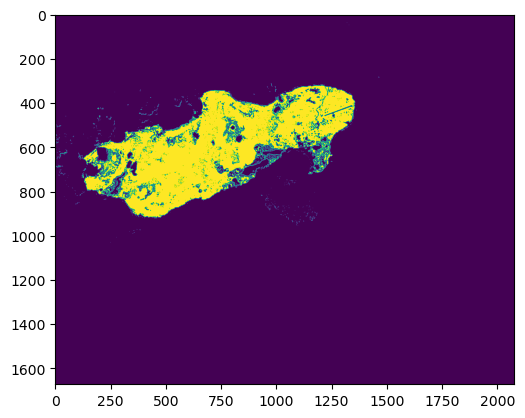

3


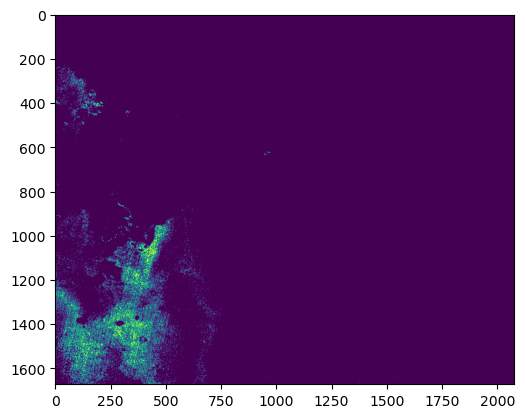

4


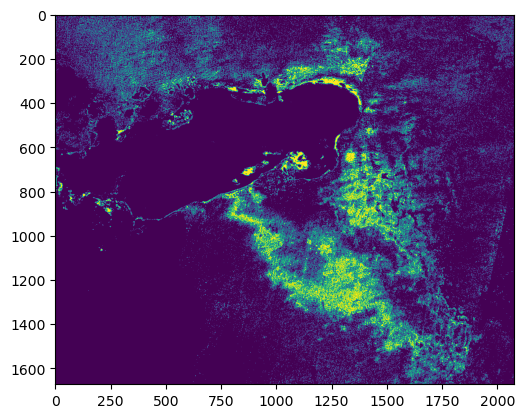

5


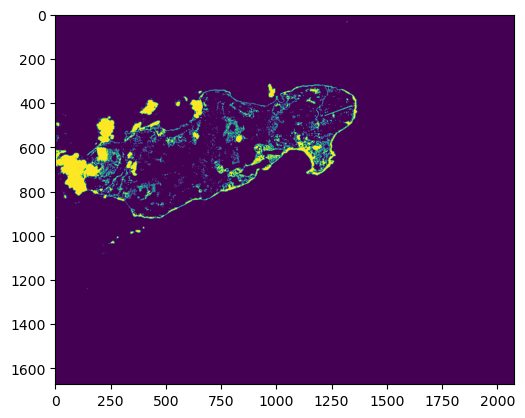

6


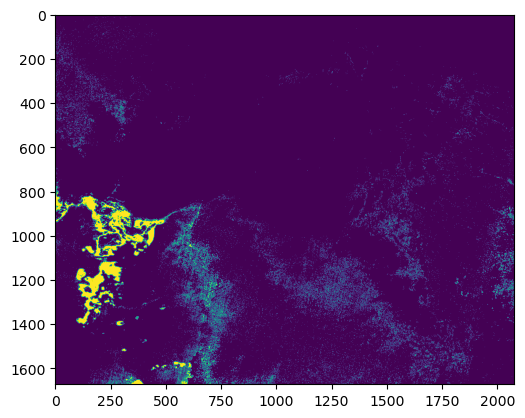

7


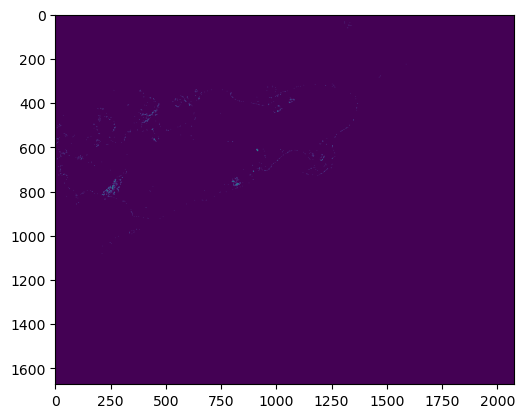

8


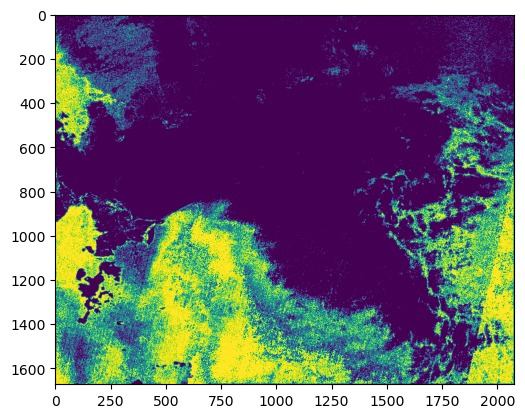

9


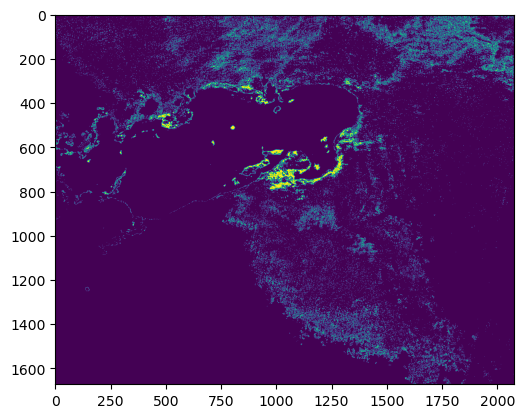

10


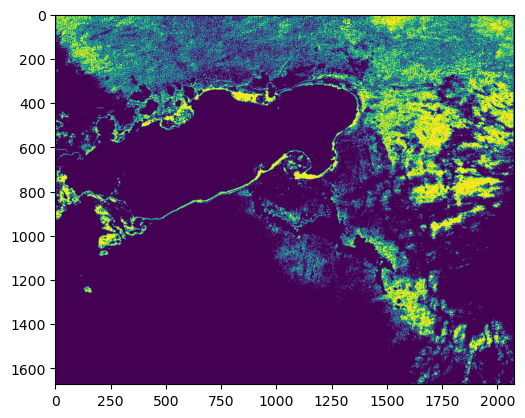

11


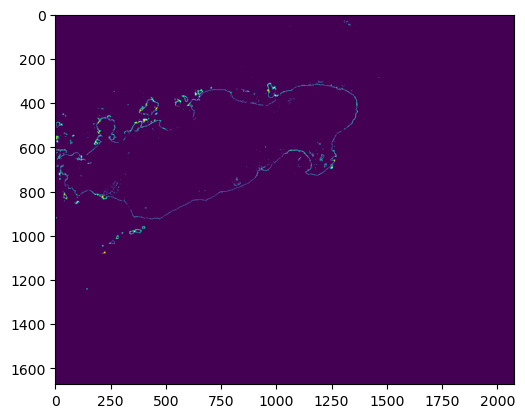

12


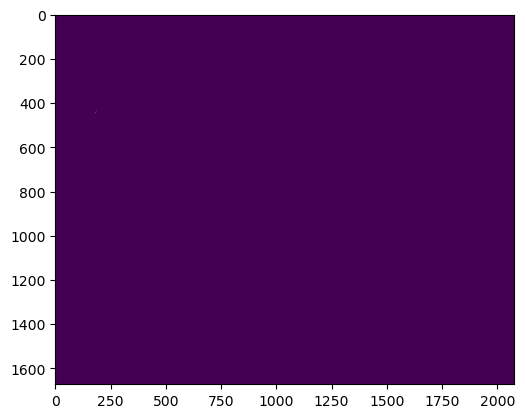

13


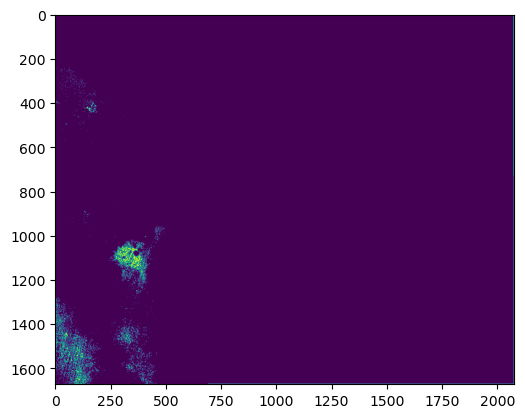

14


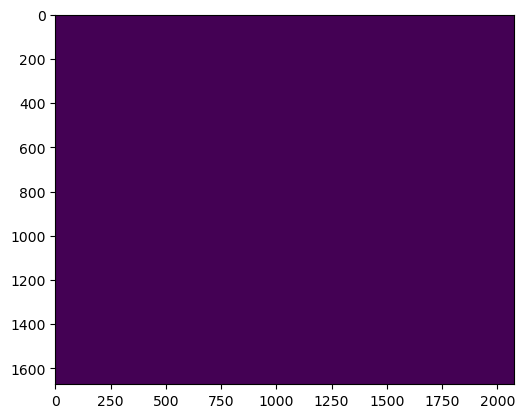

In [178]:
original_shape = img_test.shape
test_arr = img_test.reshape(original_shape[0] * original_shape[1], original_shape[2])
test_pred = bst.predict(scale_prop(test_arr))
test_pred = test_pred.reshape(original_shape[0], original_shape[1])
for i in range(15):
    print(i)
    plt.imshow(test_pred==i)
    plt.show()

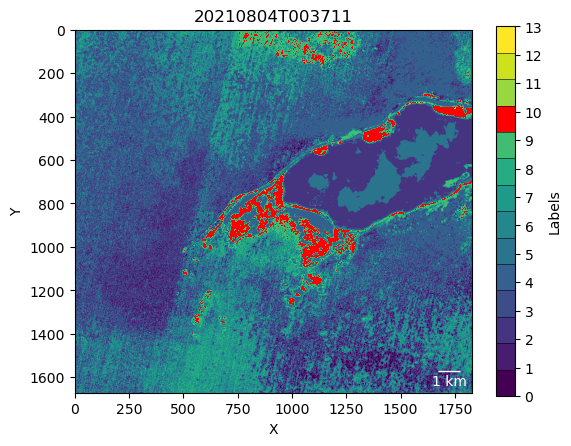

In [172]:
discrete_implot(test_pred, [10], ['red'], title = img_name.split('/')[-1].split('.')[0].split('_')[-2].split('no')[0])

In [145]:
original_shape

(1672, 1827, 12)

In [146]:
#Predict probability
#test_pred = test_pred.reshape(original_shape[0], original_shape[1], 15)

In [148]:
# discrete_implot(test_pred, [3], 'red')

In [149]:
# discrete_implot(test_pred, [11, 12,13,14], ['red','red', 'red', 'red'])

In [150]:
test_pred.shape

(1672, 1827, 14)

146

In [155]:
dir_list

['/media/ziad/Expansion/Honduras_Clipped/no_tf_S2A_MSIL2A_20221122T161601_N0400_R140_T16PEC_20221122T220303.zip.tiff',
 '/media/ziad/Expansion/Honduras_Clipped/no_tf_S2A_MSIL2A_20200516T160911_N0214_R140_T16PDC_20200516T203626.zip.tiff',
 '/media/ziad/Expansion/Honduras_Clipped/no_tf_S2A_MSIL2A_20200923T161011_N0214_R140_T16PDC_20200923T203905.zip.tiff',
 '/media/ziad/Expansion/Honduras_Clipped/no_tf_S2A_MSIL2A_20221013T161231_N0400_R140_T16PDC_20221013T224356.zip.tiff',
 '/media/ziad/Expansion/Honduras_Clipped/no_tf_S2B_MSIL2A_20200620T160829_N0214_R140_T16PDC_20200620T201455.zip.tiff',
 '/media/ziad/Expansion/Honduras_Clipped/no_tf_S2A_MSIL2A_20200923T161011_N0214_R140_T16PEC_20200923T203905.zip.tiff',
 '/media/ziad/Expansion/Honduras_Clipped/no_tf_S2A_MSIL2A_20200406T160901_N0214_R140_T16PDC_20200406T203743.zip.tiff',
 '/media/ziad/Expansion/Honduras_Clipped/no_tf_S2A_MSIL2A_20210302T161201_N0214_R140_T16PDC_20210302T204426.zip.tiff',
 '/media/ziad/Expansion/Honduras_Clipped/no_tf_S

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


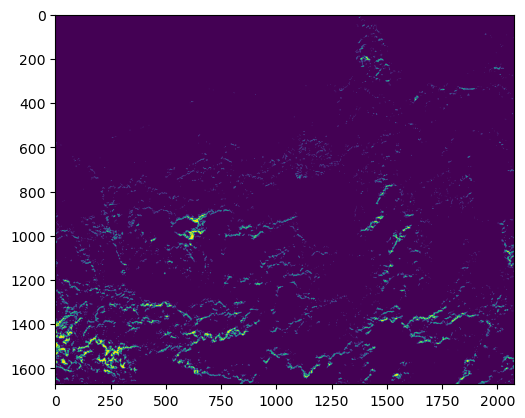

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


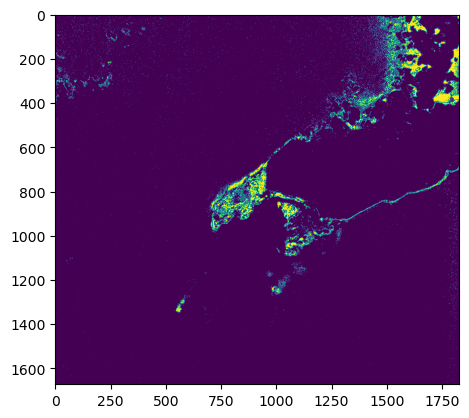

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


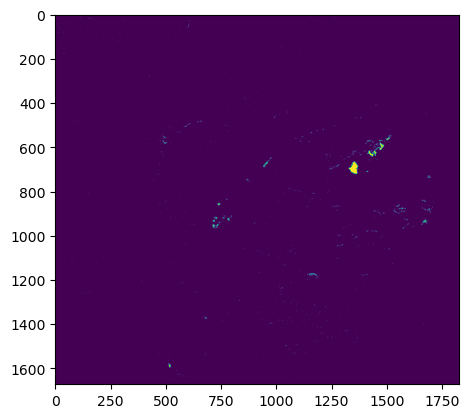

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


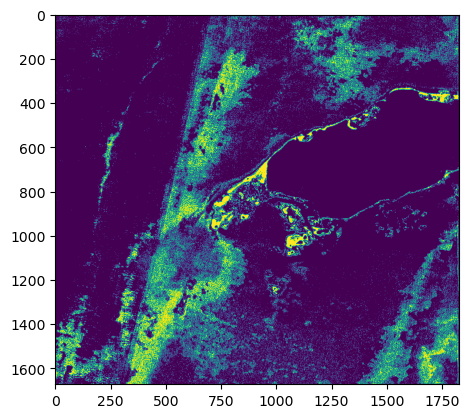

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


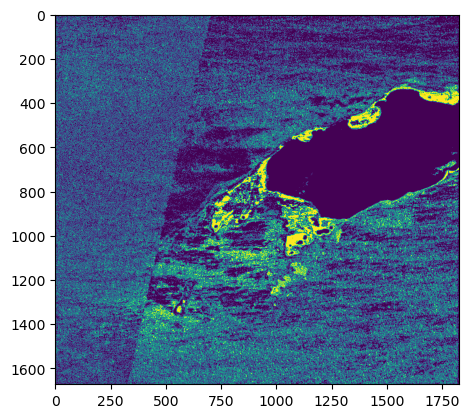

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


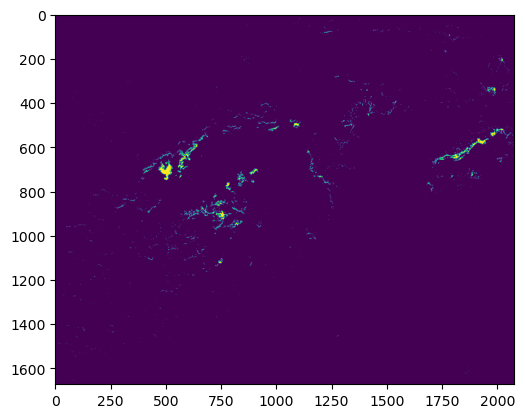

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


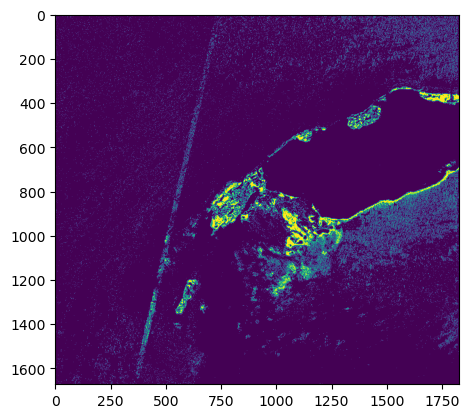

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


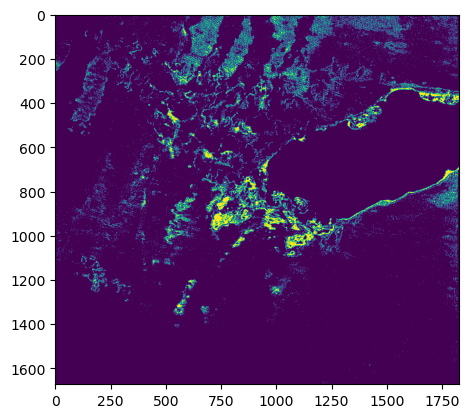

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


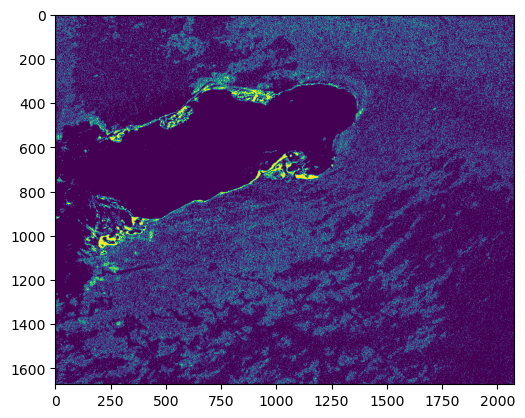

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


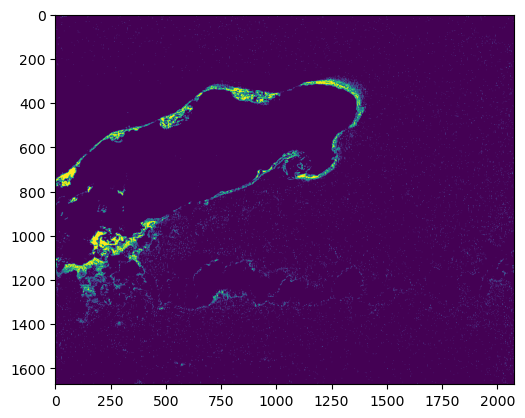

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


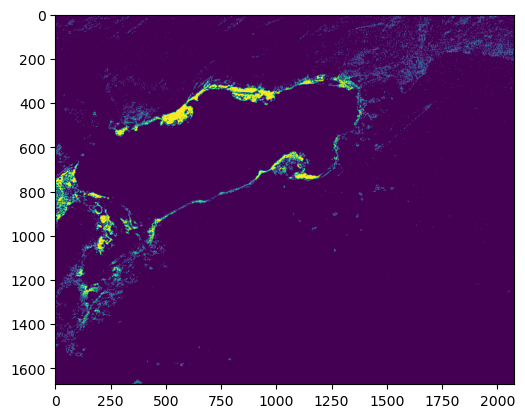

In [174]:
for i in range(len(dir_list)):
    
    img_test = ImageHelper.load_img(dir_list[i])

    original_shape = img_test.shape
    test_arr = img_test.reshape(original_shape[0] * original_shape[1], original_shape[2])
    test_pred = bst.predict_proba(scale_prop(test_arr))
    test_pred = test_pred.reshape(original_shape[0], original_shape[1], 14)
    plt.imshow(test_pred[:,:,10] > 0.99)
    plt.show()
    if i == 10:
        break

In [114]:
for i in range(15):
    plt.imshow(test_pred[:,:,i] > 0.95)
    plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Axes: >

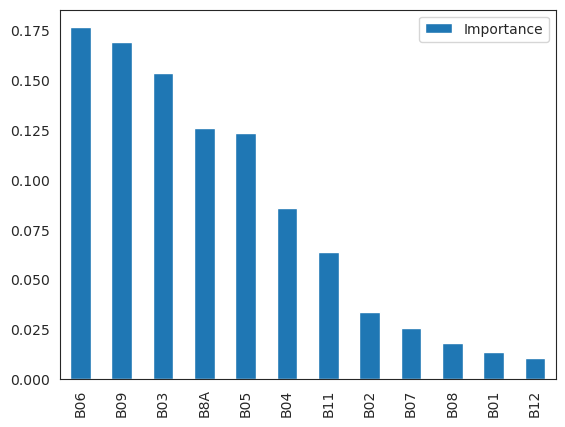

In [635]:
pd.DataFrame(bst.feature_importances_, columns = ['Importance'], index = band_mapping.keys()).sort_values(by = 'Importance', ascending = False).plot(kind = 'bar')